#### Name: Shaunak Hemant Joshi
#### UIN: 934008405
### Final Project

In [1]:
# Importing the required libraries
import transformers 
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import torch.nn as nn
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the Yelp review dataset
train_dataset = pd.read_csv('yelp_review_train.csv')
test_dataset = pd.read_csv('yelp_review_test.csv')

In [3]:
print(train_dataset.head())

                                                text  stars
0  Went for lunch and found that my burger was me...    2.0
1  I needed a new tires for my wife's car. They h...    5.0
2  Jim Woltman who works at Goleta Honda is 5 sta...    5.0
3  Been here a few times to get some shrimp.  The...    4.0
4  This is one fantastic place to eat whether you...    5.0


In [4]:
test_dataset.head()

,text,stars
0,"Hidden treasure! Awesome service, delicious fo...",5.0
1,My family and I have been patients since I wa...,5.0
2,"I rarely get pedicures, but Blue Nail's practi...",5.0
3,"We came with a large group, may of the items w...",2.0
4,The view is great from Morgan's Pier. The bart...,2.0


### a) Data Preprocessing: Pre-process the data by removing the punctuation and stopwords and converting all words to lowercase. Moreover, converting the stars into three levels: Positive > 3, negative <= 2, and neutral = 3.

#### This part of data preprocessing downloads the NLTK stopwords dataset and imports the stopwords module. Stopwords are common words (like "the", "is", "and", etc.) that are often removed during text preprocessing because they usually don't carry much meaningful information.

#### This function, data_preprocess, takes a piece of text as input and performs the following operations: Converts the text to lowercase. Removes punctuation using a regular expression. Splits the text into a list of words. Removes English stopwords. Joins the remaining words back into a cleaned text.

#### We then apply the data_preprocess function to the 'text' column of both the training (train_dataset) and testing (test_dataset) datasets. It updates the 'text' column with the preprocessed text.

#### The function, categorize_stars, takes a star rating as input and categorizes it into three sentiment categories: 'Positive' for ratings greater than 3, 'Negative' for ratings less than or equal to 2, and 'Neutral' for ratings equal to 3.

#### Then we apply the categorize_stars function to the 'stars' column of both the training and testing datasets. It creates a new 'sentiment' column in both datasets, storing the categorized sentiment labels ('Positive', 'Negative', 'Neutral') based on the star ratings.

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shaunakjoshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shaunakjoshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


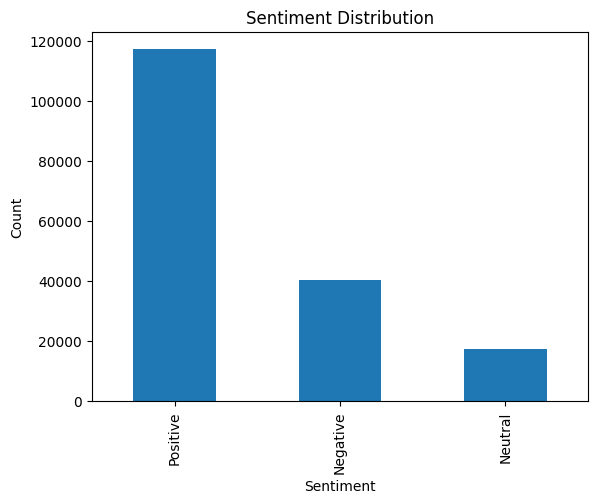

In [5]:
import nltk
import re

# This part downloads the NLTK stopwords dataset and imports the stopwords module. 
# Stopwords are common words (like "the", "is", "and", etc.) that are often removed during text preprocessing because they usually don't carry much meaningful information.
nltk.download('stopwords')
nltk.download('stopwords')
from nltk.corpus import stopwords


# Function to preprocess text
def data_preprocess(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation using regex
    text = re.sub(r'[^\w\s]', '', text)
    
    # Split text into words
    words = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    return ' '.join(words)

# Apply preprocessing to the 'text' column
train_dataset['text'] = train_dataset['text'].apply(data_preprocess)
test_dataset['text'] = test_dataset['text'].apply(data_preprocess)


# Categorize stars into positive, negative, neutral. # Categorize stars into positive, negative, neutral. 'Positive' for ratings > 3, 'Negative' for ratings less than or equal to 2, and 'Neutral' for ratings equal to 3. 
def categorize_stars(stars):
    if stars > 3:
        return 'Positive'
        # return 1
    elif stars <= 2:
        return 'Negative'
        # return 0
    else:
        return 'Neutral'
        # return 2

# Apply star categorization to the 'stars' column
# It creates a new 'sentiment' column in both datasets, storing the categorized sentiment labels ('Positive', 'Negative', 'Neutral') based on the star ratings.
train_dataset['sentiment'] = train_dataset['stars'].apply(categorize_stars)
test_dataset['sentiment'] = test_dataset['stars'].apply(categorize_stars)

# Sentiment Distribution
sentiment_distribution = pd.Series(train_dataset['sentiment']).value_counts()
sentiment_distribution.plot(kind='bar', title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [6]:
train_dataset.head()

,text,stars,sentiment
0,went lunch found burger meh obvious focus burg...,2.0,Negative
1,needed new tires wifes car special order next ...,5.0,Positive
2,jim woltman works goleta honda 5 stars knowled...,5.0,Positive
3,times get shrimp theyve got nice selection dif...,4.0,Positive
4,one fantastic place eat whether hungry need go...,5.0,Positive


In [7]:
train_dataset.tail()

,text,stars,sentiment
174752,oy great partially fault holy smokes daughter ...,2.0,Negative
174753,im huge fan chocolate maya high quality ingred...,5.0,Positive
174754,hosted wedding ceremony could happier everythi...,5.0,Positive
174755,love place fantastic lunch specials get 3 roll...,5.0,Positive
174756,happy service food one best tasting turkey bur...,5.0,Positive


In [8]:
test_dataset.head()

,text,stars,sentiment
0,hidden treasure awesome service delicious food...,5.0,Positive
1,family patients since 5 years old 34 trust qua...,5.0,Positive
2,rarely get pedicures blue nails practice combi...,5.0,Positive
3,came large group may items missing menu lobste...,2.0,Negative
4,view great morgans pier bartenders even good s...,2.0,Negative


In [9]:
train_dataset.drop(columns='stars', inplace=True)
test_dataset.drop(columns='stars', inplace=True)

In [10]:
class_levels = ['Negative', 'Neutral', 'Positive']

In [11]:
# Mapping dictionary for sentiment labels
sentiment_labels = {'Positive': 2, 'Negative': 0, 'Neutral': 1}

# Convert sentiment column to integers based on the mapping
train_dataset['sentiment'] = train_dataset['sentiment'].map(sentiment_labels)
test_dataset['sentiment'] = test_dataset['sentiment'].map(sentiment_labels)

In [12]:
train_dataset.head()

,text,sentiment
0,went lunch found burger meh obvious focus burg...,0
1,needed new tires wifes car special order next ...,2
2,jim woltman works goleta honda 5 stars knowled...,2
3,times get shrimp theyve got nice selection dif...,2
4,one fantastic place eat whether hungry need go...,2


In [13]:
test_dataset.head()

,text,sentiment
0,hidden treasure awesome service delicious food...,2
1,family patients since 5 years old 34 trust qua...,2
2,rarely get pedicures blue nails practice combi...,2
3,came large group may items missing menu lobste...,0
4,view great morgans pier bartenders even good s...,0


### b) Input data preparation: The input of the Transformer model is a fixed length review sequence where integer numbers represent words. In this part, you need to build vocabulary for the dataset and pad the review data to a fixed length.

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [15]:
device

device(type='cuda', index=0)

#### The BertTokenizer class is part of the Hugging Face transformers library and is used to tokenize and preprocess text in a way that is compatible with BERT models. It breaks down the input text into subword tokens, adds special tokens (like [CLS] for the start of a sequence and [SEP] for the separation of segments), and converts the tokens into corresponding numerical IDs that can be fed into the BERT model.

In [16]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'

In [17]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

#### The function calculate_token_lengths takes a dataset and the BERT tokenizer as input, and for each text in the dataset, it encodes the text using the tokenizer. The resulting tokens are then used to calculate the length, and the lengths are stored in a list. 

#### This process is part of the data preparation step for using BERT-based models. It helps to analyze the distribution of token lengths in the text data and determine an appropriate maximum sequence length for padding or truncation. The BERT tokenizer is used to convert text into tokenized sequences, and the resulting token lengths are visualized to gain insights into the dataset's characteristics.

100%|██████████| 174757/174757 [04:40<00:00, 623.08it/s]


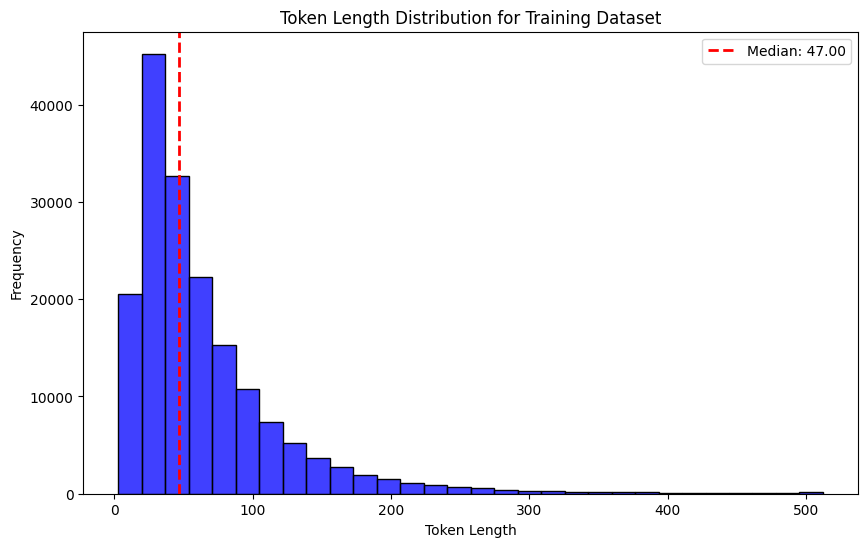

In [18]:
from tqdm import tqdm

# Function to calculate token lengths for a given dataset and tokenizer
def calculate_token_lengths(dataset, tokenizer, max_length=512):
    token_lengths = []
    for text in tqdm(dataset.text):
        tokens = tokenizer.encode(text, max_length=max_length)
        token_lengths.append(len(tokens))
    return token_lengths

# Calculate token lengths for the training dataset using the tokenizer
train_token_lengths = calculate_token_lengths(train_dataset, tokenizer)

# Calculate the median token length
median_token_length = np.median(train_token_lengths)

# Plot the token length distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_token_lengths, bins=30, kde=False, color='blue', edgecolor='black')
plt.title('Token Length Distribution for Training Dataset')
plt.xlabel('Token Length')
plt.ylabel('Frequency')

# Display the median on the plot
plt.axvline(median_token_length, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_token_length:.2f}')
plt.legend()

plt.show()

In [19]:
# Calculate the mean token length
mean_token_length = np.mean(train_token_lengths)

# Print the mean
print(f'Mean Token Length: {mean_token_length:.2f}')

Mean Token Length: 64.83


In [20]:
MAX_LEN = 120

### c) Transformer implementation: Implement a Transformer model which is composed of an encoder network (i.e., multi-head self-attention layers) and a prediction head mapping the hidden representation of input sequence into the label space (i.e., three classes)

##### This method retrieves a specific sample from the dataset. It tokenizes the review text using the BERT tokenizer (self.tokenizer.encode_plus). The tokenization includes adding special tokens, limiting the maximum length (max_length), and returning attention masks. The resulting encoded information is returned as a dictionary containing:


##### 'review_text': The original review text as a string.
##### 'input_ids': Flattened tensor of input IDs representing the tokenized and padded review text.
##### 'attention_mask': Flattened tensor representing the attention mask to indicate which tokens are actual words and which are padding tokens.
##### 'targets': Tensor containing the target labels converted to a PyTorch tensor of type torch.long.


In [21]:
from torch.utils.data import Dataset, DataLoader
class ReviewDataset(Dataset):
    def __init__(self,text,targets,tokenizer,max_len):
        self.text = text
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self,item):
        review = str(self.text[item])
        target = self.targets[item]

        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
            )
        
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
            }

#### Train Test dataset split

In [22]:
from sklearn.model_selection import train_test_split
df_trainset, df_valset = train_test_split(train_dataset, test_size=0.2, random_state=42)
df_testset = test_dataset

In [23]:
df_trainset.shape, df_valset.shape, df_testset.shape

((139805, 2), (34952, 2), (13980, 2))

#### The provided function create_data_loader creates a PyTorch DataLoader for a given DataFrame df containing text and sentiment data. It uses the ReviewDataset defined earlier to handle the tokenization and formatting of the data for BERT-based models

In [24]:
def create_data_loader(df,tokenizer,max_len,batch_size):
    ds = ReviewDataset(
        text = df.text.to_numpy(), 
        targets = df.sentiment.to_numpy(),
        tokenizer = tokenizer,
        max_len=max_len)
    
    return DataLoader(ds,
                      batch_size=batch_size,
                      num_workers=4)

In [25]:
BATCH_SIZE = 32
train_data_loader = create_data_loader(df_trainset, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_valset, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_testset, tokenizer, MAX_LEN, BATCH_SIZE)

In [26]:
bertModel = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME, return_dict=False)

#### c i) Model-1
#### To the pretrained bert model, there is an addition of dropout layers for regularization, linear layers for dimensionality reduction, ReLU activation for non-linearity, and a final linear layer for sentiment classification. The optimizer used here is SGD with learning rate = 0.005 . The model is trained here for 5 epochs. The dropouts used here are 0.4 and 0.3. We are adding another layer to our fully connected network to bring down the number of layers from 128 to 64 in the final layer.

In [27]:
class SentimentClassifier(nn.Module):
  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = bertModel
    self.drop = nn.Dropout(p=0.4)
    self.out1 = nn.Linear(self.bert.config.hidden_size, 128)
    self.drop1 = nn.Dropout(p=0.3)
    self.relu = nn.ReLU()
    self.out2 = nn.Linear(128, 64)
    self.out = nn.Linear(64, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    output = self.drop(pooled_output)
    output = self.out1(output)
    output = self.relu(output)
    output = self.drop1(output)
    output = self.out2(output)
    output = self.relu(output)
    return self.out(output)

In [28]:
from torch.optim import SGD

model = SentimentClassifier(len(class_levels))
model = model.to(device)

EPOCHS = 5

optimizer = SGD(model.parameters(), lr=0.005, weight_decay=0)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

# This function is designed to perform one training epoch for a PyTorch model using a specified data loader, updating its parameters based on the training data
def train_epoch(model,data_loader,loss_fn,optimizer,device,scheduler,n_examples):
    
    # This line sets the PyTorch model to training mode. This is necessary because certain layers like dropout behave differently during training and evaluation.
    model = model.train()
    losses = []
    correct_predictions = 0

    for data in data_loader:
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        targets = data['targets'].to(device)

        # This line performs a forward pass through the model, obtaining predictions for the given input.
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
            )
        _, preds = torch.max(outputs, dim=1)
        # This line computes the loss between the model's predictions and the actual targets using the specified loss function
        loss = loss_fn(outputs,targets)

        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

        # This line computes gradients of the loss with respect to the model parameters.
        loss.backward()
        #  Clips the gradients to prevent exploding gradients.
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

# This function is designed to evaluate a PyTorch model on a validation or test set using a specified data loader
def eval_model(model, data_loader, loss_fn, device, n_examples):
  # This line sets the PyTorch model to evaluation mode. In this mode, layers like dropout behave differently than during training.
  model = model.eval()
  losses = []
  correct_predictions = 0
  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
        
      # This line performs a forward pass through the model to obtain predictions for the given input
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
    
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, targets)
      # Counts the number of correct predictions for accuracy calculation.
      correct_predictions += torch.sum(preds == targets)
      # Appends the current batch's loss to the list of losses.
      losses.append(loss.item())

  # Calculates the evaluation accuracy and average loss based on the accumulated statistics.
  return correct_predictions.double() / n_examples, np.mean(losses)

### d i) Model-1 training 
#### Train the model with stochastic gradient descent using mini- batch fashion based on the ‘yelp review train.csv’ dataset. Print the training curve, where the x- axis is the training epochs, and the y-axis is the training accuracy.

In [30]:
from collections import defaultdict
history = defaultdict(list)
best_accuracy = 0
model_index = 1

# New dictionary to store the best validation accuracy along with model index
best_val_history = {'best_val_accuracy': 0, 'best_model_index': 0}


for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)
    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_trainset)
    )
    print(f'Train loss {train_loss} accuracy {train_acc}')
    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(df_valset)
    )
    
    print(f'Val loss {val_loss} accuracy {val_acc}')
    
    print()
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    
    if val_acc > best_accuracy:
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'best_accuracy': val_acc,
            'best_model_index': model_index,
            }, 'best_model.pt')
        best_accuracy = val_acc
        best_model_index = model_index

# Update the new dictionary with the best validation accuracy and model index
best_val_history['best_val_accuracy'] = best_accuracy
best_val_history['best_model_index'] = best_model_index

Epoch 1/5
----------
Train loss 0.39610402174012616 accuracy 0.8514359286148564
Val loss 0.3762947191490237 accuracy 0.856202792401007

Epoch 2/5
----------
Train loss 0.377721537662592 accuracy 0.857429991774257
Val loss 0.3708295297194596 accuracy 0.8571183337148088

Epoch 3/5
----------
Train loss 0.36825308789477573 accuracy 0.8597832695540216
Val loss 0.3660908210136453 accuracy 0.8595788509956512

Epoch 4/5
----------
Train loss 0.36286698802487066 accuracy 0.8618647401738135
Val loss 0.36297980859902945 accuracy 0.8622396429388877

Epoch 5/5
----------
Train loss 0.36126807267918526 accuracy 0.8622438396337756
Val loss 0.36297980859902945 accuracy 0.8622396429388877



#### Plotting Training vs Validation Loss

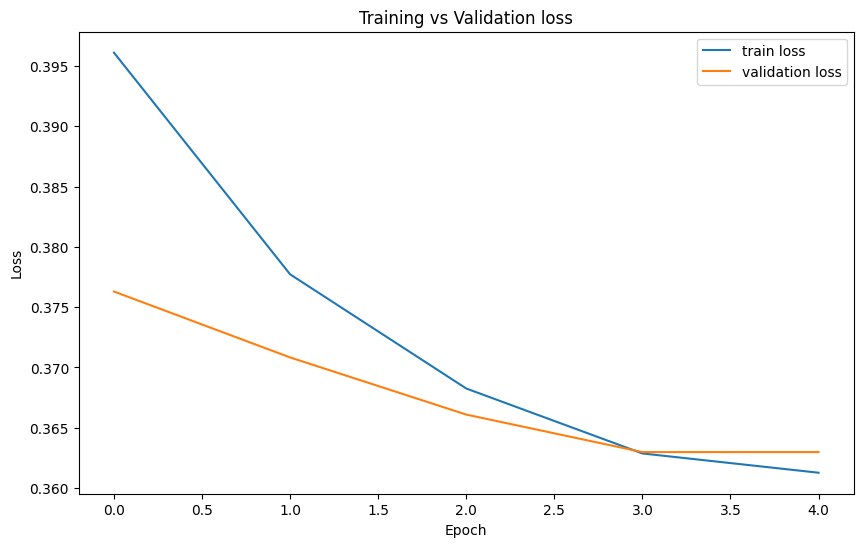

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(history['train_loss'], label='train loss')
plt.plot(history['val_loss'], label='validation loss')
plt.title('Training vs Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

#### Plotting Training vs Validation Accuracy

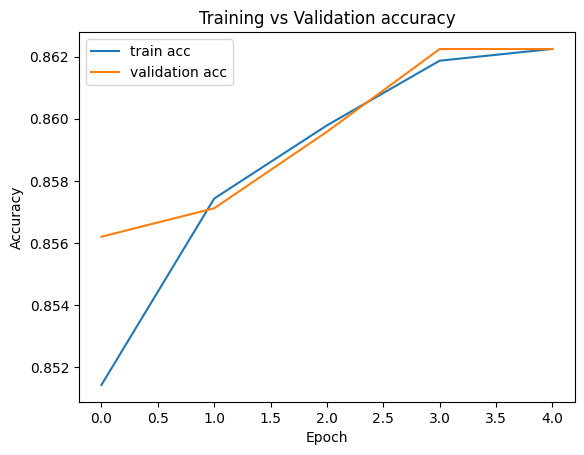

In [32]:
train_acc_cpu = [acc.item() for acc in history['train_acc']]
val_acc_cpu = [acc.item() for acc in history['val_acc']]

plt.plot(train_acc_cpu, label='train acc')
plt.plot(val_acc_cpu, label='validation acc')
plt.title('Training vs Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

#### c ii) Model-2
#### To the pretrained bert model, there is an addition of dropout layers for regularization, linear layers for dimensionality reduction, ReLU activation for non-linearity, and a final linear layer for sentiment classification. The optimizer used here is SGD with learning rate = 0.005 . The model is trained here for 5 epochs. The dropouts used here are 0.4 and 0.4. 

In [33]:
class SentimentClassifier2(nn.Module):
  def __init__(self, n_classes):
    super(SentimentClassifier2, self).__init__()
    self.bert = bertModel
    self.drop = nn.Dropout(p=0.4)
    self.out1 = nn.Linear(self.bert.config.hidden_size, 128)
    self.drop1 = nn.Dropout(p=0.4)
    self.relu = nn.ReLU()
    self.out = nn.Linear(128, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    output = self.drop(pooled_output)
    output = self.out1(output)
    output = self.relu(output)
    output = self.drop1(output)
    return self.out(output)

In [34]:
from torch.optim import SGD

model2 = SentimentClassifier2(len(class_levels))
model2 = model2.to(device)

EPOCHS = 5

optimizer = SGD(model2.parameters(), lr=0.005, weight_decay=0)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

# This function is designed to perform one training epoch for a PyTorch model using a specified data loader, updating its parameters based on the training data
def train_epoch(model2,data_loader,loss_fn,optimizer,device,scheduler,n_examples):
    
    # This line sets the PyTorch model to training mode. This is necessary because certain layers like dropout behave differently during training and evaluation.
    model2 = model2.train()
    losses = []
    correct_predictions = 0

    for data in data_loader:
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        targets = data['targets'].to(device)

        # This line performs a forward pass through the model, obtaining predictions for the given input.
        outputs = model2(
            input_ids=input_ids,
            attention_mask=attention_mask
            )
        _, preds = torch.max(outputs, dim=1)
        # This line computes the loss between the model's predictions and the actual targets using the specified loss function
        loss = loss_fn(outputs,targets)

        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

        # This line computes gradients of the loss with respect to the model parameters.
        loss.backward()
        #  Clips the gradients to prevent exploding gradients.
        nn.utils.clip_grad_norm_(model2.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

# This function is designed to evaluate a PyTorch model on a validation or test set using a specified data loader
def eval_model(model2, data_loader, loss_fn, device, n_examples):
  # This line sets the PyTorch model to evaluation mode. In this mode, layers like dropout behave differently than during training.
  model2 = model2.eval()
  losses = []
  correct_predictions = 0
  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
        
      # This line performs a forward pass through the model to obtain predictions for the given input
      outputs = model2(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
    
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, targets)
      # Counts the number of correct predictions for accuracy calculation.
      correct_predictions += torch.sum(preds == targets)
      # Appends the current batch's loss to the list of losses.
      losses.append(loss.item())

  # Calculates the evaluation accuracy and average loss based on the accumulated statistics.
  return correct_predictions.double() / n_examples, np.mean(losses)

### d ii) Model-2 training 
#### Train the model with stochastic gradient descent using mini- batch fashion based on the ‘yelp review train.csv’ dataset. Print the training curve, where the x- axis is the training epochs, and the y-axis is the training accuracy.

In [35]:
from collections import defaultdict
history2 = defaultdict(list)
best_accuracy = 0
model_index = 2

# New dictionary to store the best validation accuracy along with model index
best_val_history = {'best_val_accuracy': 0, 'best_model_index': 0}


for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)
    train_acc, train_loss = train_epoch(
        model2,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_trainset)
    )
    print(f'Train loss {train_loss} accuracy {train_acc}')
    val_acc, val_loss = eval_model(
        model2,
        val_data_loader,
        loss_fn,
        device,
        len(df_valset)
    )
    
    print(f'Val loss {val_loss} accuracy {val_acc}')
    
    print()
    history2['train_acc'].append(train_acc)
    history2['train_loss'].append(train_loss)
    history2['val_acc'].append(val_acc)
    history2['val_loss'].append(val_loss)
    
    if val_acc > best_accuracy:
        torch.save({
            'epoch': epoch,
            'model_state_dict': model2.state_dict(),
            'best_accuracy': val_acc,
            'best_model_index': model_index,
            }, 'best_model.pt')
        best_accuracy = val_acc
        best_model_index = model_index

# Update the new dictionary with the best validation accuracy and model index
best_val_history['best_val_accuracy'] = best_accuracy
best_val_history['best_model_index'] = best_model_index

Epoch 1/5
----------
Train loss 0.3823702155266441 accuracy 0.8586531239941347
Val loss 0.363386516930486 accuracy 0.8594071869993134

Epoch 2/5
----------
Train loss 0.3559201801181672 accuracy 0.8669647008333036
Val loss 0.3516561152227734 accuracy 0.8638704509040971

Epoch 3/5
----------
Train loss 0.3435151423396904 accuracy 0.8715782697328421
Val loss 0.3486428332190419 accuracy 0.8656157015335317

Epoch 4/5
----------
Train loss 0.3377003139662958 accuracy 0.8739458531526054
Val loss 0.340726037440721 accuracy 0.8687628747997254

Epoch 5/5
----------
Train loss 0.33278722785588916 accuracy 0.875090304352491
Val loss 0.33967796105922143 accuracy 0.8710803387502861



#### Plotting Training vs Validation Loss

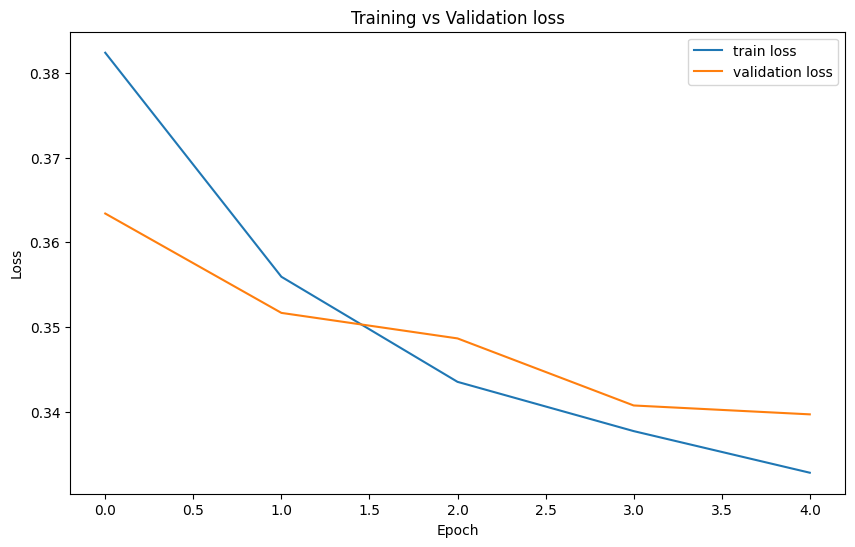

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(history2['train_loss'], label='train loss')
plt.plot(history2['val_loss'], label='validation loss')
plt.title('Training vs Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

#### Plotting Training vs Validation Accuracy

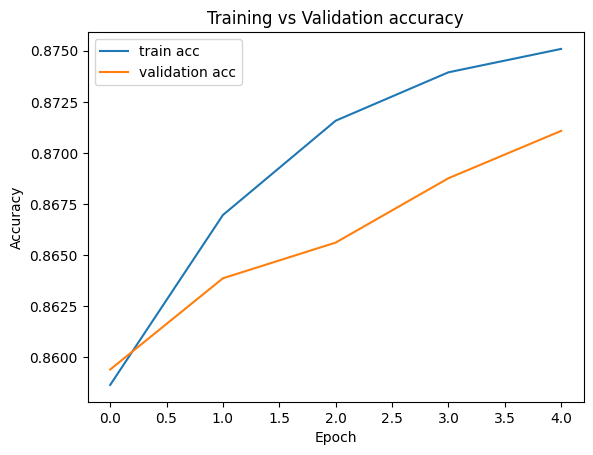

In [37]:
train_acc_cpu = [acc.item() for acc in history2['train_acc']]
val_acc_cpu = [acc.item() for acc in history2['val_acc']]

plt.plot(train_acc_cpu, label='train acc')
plt.plot(val_acc_cpu, label='validation acc')
plt.title('Training vs Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

### c iii) Model-3
#### To the pretrained bert model, there is an addition of dropout layers for regularization, the dropouts used here are 0.4 and 0.3,  linear layers for dimensionality reduction, ReLU activation for non-linearity, and a final linear layer for sentiment classification. The optimizer used here is SGD with learning rate = 0.001. The model is trained here for 5 epochs.

In [38]:
class SentimentClassifier3(nn.Module):
  def __init__(self, n_classes):
    super(SentimentClassifier3, self).__init__()
    self.bert = bertModel
    self.drop = nn.Dropout(p=0.4)
    self.out1 = nn.Linear(self.bert.config.hidden_size, 128)
    self.drop1 = nn.Dropout(p=0.3)
    self.relu = nn.ReLU()
    self.out = nn.Linear(128, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    output = self.drop(pooled_output)
    output = self.out1(output)
    output = self.relu(output)
    output = self.drop1(output)
    return self.out(output)

In [39]:
from torch.optim import SGD

model3 = SentimentClassifier3(len(class_levels))
model3 = model3.to(device)

EPOCHS = 5

optimizer = SGD(model3.parameters(), lr=0.001, weight_decay=0)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

# This function is designed to perform one training epoch for a PyTorch model using a specified data loader, updating its parameters based on the training data
def train_epoch(model3,data_loader,loss_fn,optimizer,device,scheduler,n_examples):
    # This line sets the PyTorch model to training mode. This is necessary because certain layers like dropout behave differently during training and evaluation.
    model3 = model3.train()
    losses = []
    correct_predictions = 0

    for data in data_loader:
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        targets = data['targets'].to(device)

        # This line performs a forward pass through the model, obtaining predictions for the given input.
        outputs = model3(
            input_ids=input_ids,
            attention_mask=attention_mask
            )
        _, preds = torch.max(outputs, dim=1)
        # This line computes the loss between the model's predictions and the actual targets using the specified loss function
        loss = loss_fn(outputs,targets)

        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

        # This line computes gradients of the loss with respect to the model parameters.
        loss.backward()
        #  Clips the gradients to prevent exploding gradients.
        nn.utils.clip_grad_norm_(model3.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

# This function is designed to evaluate a PyTorch model on a validation or test set using a specified data loader
def eval_model(model3, data_loader, loss_fn, device, n_examples):
  # This line sets the PyTorch model to evaluation mode. In this mode, layers like dropout behave differently than during training.
  model3 = model3.eval()
  losses = []
  correct_predictions = 0

    
  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      # This line performs a forward pass through the model to obtain predictions for the given input
      outputs = model3(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, targets)
      # Counts the number of correct predictions for accuracy calculation.
      correct_predictions += torch.sum(preds == targets)
      # Appends the current batch's loss to the list of losses.
      losses.append(loss.item())

  # Calculates the evaluation accuracy and average loss based on the accumulated statistics.      
  return correct_predictions.double() / n_examples, np.mean(losses)

#### d iii) Model-3 training 
#### Train the model with stochastic gradient descent using mini- batch fashion based on the ‘yelp review train.csv’ dataset. Print the training curve, where the x-axis is the training epochs, and the y-axis is the training accuracy.

In [40]:
from collections import defaultdict
history3 = defaultdict(list)
model_index=3

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)
    train_acc, train_loss = train_epoch(
        model3,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_trainset)
    )
    print(f'Train loss {train_loss} accuracy {train_acc}')
    val_acc, val_loss = eval_model(
        model3,
        val_data_loader,
        loss_fn,
        device,
        len(df_valset)
    )
    
    print(f'Val loss {val_loss} accuracy {val_acc}')
    
    print()
    history3['train_acc'].append(train_acc)
    history3['train_loss'].append(train_loss)
    history3['val_acc'].append(val_acc)
    history3['val_loss'].append(val_loss)
    
    if val_acc > best_accuracy:
        torch.save({
            'epoch': epoch,
            'model_state_dict': model3.state_dict(),
            'best_accuracy': val_acc,
            'best_model_index': model_index,
            }, 'best_model.pt')
        best_accuracy = val_acc
        best_model_index = model_index

# Update the new dictionary with the best validation accuracy and model index
best_val_history['best_val_accuracy'] = best_accuracy
best_val_history['best_model_index'] = best_model_index

Epoch 1/5
----------
Train loss 0.40128869368677883 accuracy 0.8558849826544115
Val loss 0.34923267143131775 accuracy 0.8681334401464866

Epoch 2/5
----------
Train loss 0.3401237375536304 accuracy 0.8742033546725797
Val loss 0.34679084455752907 accuracy 0.8683909361409934

Epoch 3/5
----------
Train loss 0.33546736641002756 accuracy 0.8755981545724402
Val loss 0.34282503290014976 accuracy 0.8701647974364843

Epoch 4/5
----------
Train loss 0.33281356081346075 accuracy 0.8756410714924359
Val loss 0.3414506952483667 accuracy 0.87050812542916

Epoch 5/5
----------
Train loss 0.3311893307235331 accuracy 0.8765780909123422
Val loss 0.3416526038727952 accuracy 0.8720817120622568



#### Plotting Training vs Validation Loss

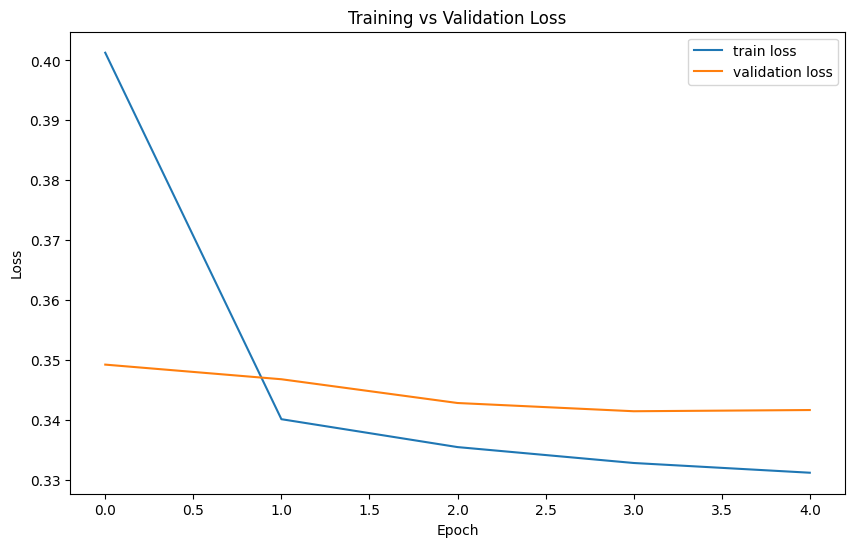

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(history3['train_loss'], label='train loss')
plt.plot(history3['val_loss'], label='validation loss')
plt.title('Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

#### Plotting Training vs Validation Accuracy

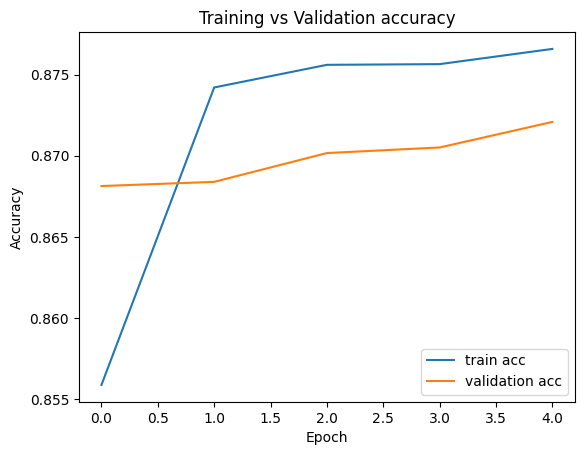

In [42]:
train_acc_cpu = [acc.item() for acc in history3['train_acc']]
val_acc_cpu = [acc.item() for acc in history3['val_acc']]

plt.plot(train_acc_cpu, label='train acc')
plt.plot(val_acc_cpu, label='validation acc')
plt.title('Training vs Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

In [43]:
print(best_accuracy)

tensor(0.8721, device='cuda:0', dtype=torch.float64)


Validation accuracy for the best model is 87.21%.

In [44]:
print(best_model_index)

3


The best model was the 3rd model as it was the one that has the highest validation accuracy and we will be calculating the test accuracy on this model.

Here, we have tested three different combinations of the model with a pretrained bert base uncased model and adding additional fully connected layers to this pretrained bert model.

In the first combination, the optimizer we have used is SGD with learning rate = 0.005 . The model is trained here for 5 epochs. The dropouts used here are 0.4 and 0.3. We are adding another layer to our fully connected network to bring down the number of layers from 128 to 64 in the final layer. From this model, we can notice that the max validation accuracy comes out to be 86% and the training/validation loss comes down to 0.36. 

In the second combination, the optimizer we have used is SGD with learning rate = 0.005 . The model is trained here for 5 epochs. The dropouts used here are 0.4 and 0.4. Here, the final layer comes out to be 128. From this model, we can notice that the max validation accuracy comes out to be 87% and the training/validation loss comes down to 0.33. Here, we can notice that the model is performing slightly better than the first model as we have reduced the complexity of the model by reducing the number of fully connected layers. This gives us a better result than the first model.

In the third combination, the optimizer we have used here is SGD with learning rate = 0.001. The model is trained here for 5 epochs. The dropouts used here are 0.4 and 0.3. From this model, we can notice that the max validation accuracy comes out to be 87.2% and the training/validation loss comes down to 0.34. This model is performing similar to the second model we have but is giving more accurate predicitons on the training and validation dataset. This might be due to reducing the learning rate to 0.001 and a smaller dropout. This might help the model to work on more features in the training dataset and thus perform better on the validation dataset.

### e) Result analysis: Load the best model saved during training and report the accuracy of the model on the test set (i.e., ‘yelp review test.csv’). What are the impacts of hyper- parameters, such as the hidden dimension and the number of attention layers, on the Transformer? 

Here, we are loading our best model from a checkpoint file, initializing a new instance of the model architecture, loading the  weights into the new model, and moving the model to the specified device for further use

In [47]:
checkpoint = torch.load('best_model.pt')

model = SentimentClassifier3(len(class_levels))

# Load the state dictionary into your model
model.load_state_dict(checkpoint['model_state_dict'])

model.to(device)

SentimentClassifier3(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementw

In [49]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_testset)
)

print(f'Test accuracy: {test_acc}')

Test accuracy: 0.8732474964234621


In [85]:
def make_preds(model, data_loader):
  model = model.eval()
  
  input_texts = []
  predictions = []
  prediction_probs = []
  correct_text_values = []
    
  with torch.no_grad():
    for d in data_loader:
      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model2(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      input_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
      correct_text_values.extend(targets)
  
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  correct_text_values = torch.stack(correct_text_values).cpu()
  return input_texts, predictions, prediction_probs, correct_text_values

In [86]:
y_input_texts, y_pred, y_pred_probs, y_test = make_preds(
  model,
  test_data_loader
)

In [87]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred, target_names=class_levels))

              precision    recall  f1-score   support

    Negative       0.84      0.88      0.86      3145
     Neutral       0.47      0.40      0.43      1416
    Positive       0.93      0.94      0.94      9419

    accuracy                           0.87     13980
   macro avg       0.75      0.74      0.74     13980
weighted avg       0.87      0.87      0.87     13980



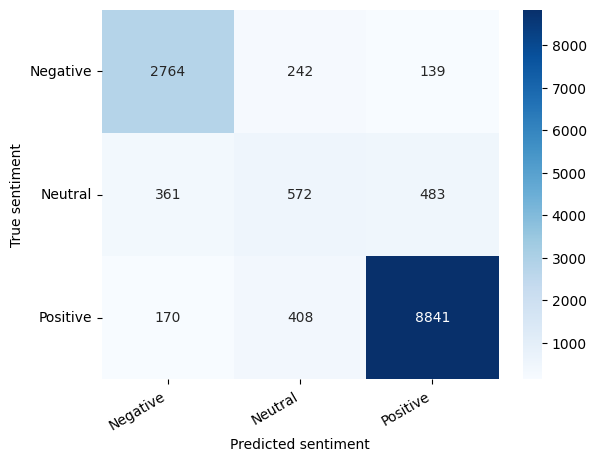

In [88]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_levels, columns=class_levels)
show_confusion_matrix(df_cm)

The hyperparameters, including the hidden dimension and the number of attention layers, play a crucial role in shaping the behavior and performance of a Transformer-based model like BERT. 

**Hidden Dimension**:

The hidden dimension (also referred to as the model dimension or embedding dimension) determines the size of the vector space in which the model represents words and sentences.
A larger hidden dimension allows the model to capture more complex relationships and patterns in the data but comes with increased computational requirements.
Smaller hidden dimensions may lead to a reduction in model capacity and the ability to capture nuanced features. 

The hidden dimension, or embedding dimension, of the BERT model we are using is 768.


**Number of Attention Layers**:

The number of attention layers defines how many self-attention layers are stacked in the Transformer model.
A higher number of attention layers enables the model to capture long-range dependencies and relationships in the input sequence.
However, increasing the number of attention layers also increases computational complexity, training time, and memory requirements.
Too few attention layers may limit the model's ability to capture complex patterns in the data.

Each BertLayer contains a BertAttention module, which, in turn, consists of a BertSelfAttention module for performing self-attention computations. This model consists of 12 BERT layers and thus there are 12 self attention layers in this model.

Here we have not experimented with the number of attention layers in the Transformer model and not even with the number of hidden dimensions as the pre-trained BERT model has 768 hidden dimensions and 12 attention layers,  which is quite high and they give a very good prediction for sentiment analysis. Instead, we have changed the number of fully connected layers in the Transformer model and experimented with the dropout rate and the learning rate to achieve better accuracy and thus results.

### Testing on sample texts

#### Neutral Text

In [89]:
sample_input1 = "Service was not good and not bad"

In [90]:
review_encoded1 = tokenizer.encode_plus(
  sample_input1,
  max_length=MAX_LEN,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)

/scratch/user/shaunakjoshi/transformer/myenv/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [91]:
input_ids = review_encoded1['input_ids'].to(device)
attention_mask = review_encoded1['attention_mask'].to(device)
output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)
print(f'Sample Input: {sample_input1}')
print(f'Sentiment  : {class_levels[prediction]}')

Sample Input: Service was not good and not bad
Sentiment  : Neutral


#### Positive Text

In [92]:
sample_input2 = "The food was very delicious"

In [93]:
review_encoded2 = tokenizer.encode_plus(
  sample_input2,
  max_length=MAX_LEN,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)

In [94]:
input_ids = review_encoded2['input_ids'].to(device)
attention_mask = review_encoded2['attention_mask'].to(device)
output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)
print(f'Sample Input: {sample_input2}')
print(f'Sentiment  : {class_levels[prediction]}')

Sample Input: The food was very delicious
Sentiment  : Positive


#### Negative Text

In [95]:
sample_input3 = "Food was very bland and tasteless"

In [96]:
review_encoded3 = tokenizer.encode_plus(
  sample_input3,
  max_length=MAX_LEN,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)

In [97]:
input_ids = review_encoded3['input_ids'].to(device)
attention_mask = review_encoded3['attention_mask'].to(device)
output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)
print(f'Sample Input: {sample_input3}')
print(f'Sentiment  : {class_levels[prediction]}')

Sample Input: Food was very bland and tasteless
Sentiment  : Negative
